# Выбор локации для скважины

Надо построить модель, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.simplefilter("ignore")

Посмотрим датасэты.

In [ ]:
datas = [data1, data2, data3]
for i in range(len(datas)):
    print(datas[i].head())
    print()

      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746



Выведем информацию о таблицах.

In [ ]:
for i in range(len(datas)):
    print(datas[i].info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column

В каждом датасэте имеются следующие данные:
- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
- product — объём запасов в скважине (тыс. баррелей)

Проверим данные на дубликаты по столбцу 'id'.

In [ ]:
for i in range(len(datas)):
    print(datas[i]['id'].duplicated().sum())
    print()

10

4

4



Во всех датасэтах присутствуют дубликаты по id скважины. Удалим их.

In [ ]:
for i in range(len(datas)):
    datas[i] = datas[i].drop_duplicates(subset=['id'])
    print(datas[i].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99990 non-null  object 
 1   f0       99990 non-null  float64
 2   f1       99990 non-null  float64
 3   f2       99990 non-null  float64
 4   product  99990 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       99996 non-null  object 
 1   f0       99996 non-null  float64
 2   f1       99996 non-null  float64
 3   f2       99996 non-null  float64
 4   product  99996 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count  

Рассмотрим разброс значений в данных.

In [ ]:
for i in range(len(datas)):
    print(datas[i].describe())
    print()

                 f0            f1            f2       product
count  99990.000000  99990.000000  99990.000000  99990.000000
mean       0.500454      0.250141      2.502629     92.499684
std        0.871844      0.504430      3.248149     44.288304
min       -1.408605     -0.848218    -12.088328      0.000000
25%       -0.072572     -0.200877      0.287784     56.497069
50%        0.502405      0.250252      2.515969     91.847928
75%        1.073626      0.700640      4.715035    128.563699
max        2.362331      1.343769     16.003790    185.364347

                 f0            f1            f2       product
count  99996.000000  99996.000000  99996.000000  99996.000000
mean       1.141209     -4.796608      2.494501     68.823916
std        8.965815      5.119906      1.703579     45.944663
min      -31.609576    -26.358598     -0.018144      0.000000
25%       -6.298551     -8.267985      1.000021     26.953261
50%        1.153055     -4.813172      2.011475     57.085625
75%    

Удалим столбец 'id', так как эта информация бесполезна для предсказаний.

In [ ]:
data1 = data1.drop(['id'], axis=1)
data2 = data2.drop(['id'], axis=1)
data3 = data3.drop(['id'], axis=1)

Построим гистограммы по каждому датасэту.

[[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}>
  <AxesSubplot:title={'center':'product'}>]]


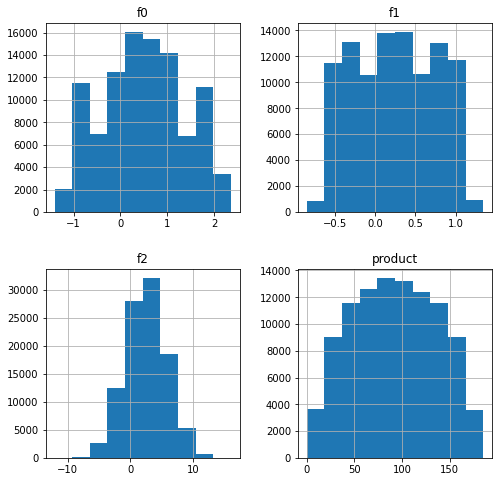

[[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}>
  <AxesSubplot:title={'center':'product'}>]]


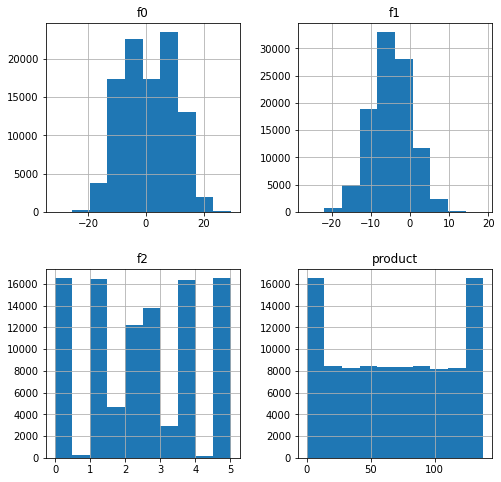

[[<AxesSubplot:title={'center':'f0'}> <AxesSubplot:title={'center':'f1'}>]
 [<AxesSubplot:title={'center':'f2'}>
  <AxesSubplot:title={'center':'product'}>]]


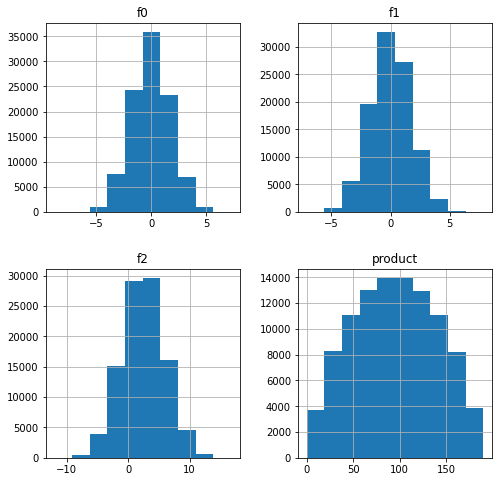

In [ ]:
for i in range(len(datas)):
    print(datas[i].hist(figsize=(8, 8)))
    plt.show()


Видно, что во датасэте по второму региону данные по f2 и product не нормально распределены. В третьем регионе с распределением данных все хорошо. В первом датасэте присутствуют некоторые провалы в распределении.

Проверим данные на мультиколлениарность.

In [ ]:
for i in range(len(datas)):
    print(datas[i].corr(method='spearman'))
    print()

               f0        f1        f2   product
f0       1.000000 -0.471379 -0.002739  0.128379
f1      -0.471379  1.000000  0.001440 -0.181136
f2      -0.002739  0.001440  1.000000  0.486370
product  0.128379 -0.181136  0.486370  1.000000

               f0        f1        f2   product
f0       1.000000  0.182247 -0.002024 -0.122901
f1       0.182247  1.000000 -0.003674 -0.033906
f2      -0.002024 -0.003674  1.000000  0.975604
product -0.122901 -0.033906  0.975604  1.000000

               f0        f1        f2   product
f0       1.000000  0.002471  0.000046 -0.002453
f1       0.002471  1.000000  0.000349 -0.001508
f2       0.000046  0.000349  1.000000  0.448459
product -0.002453 -0.001508  0.448459  1.000000



<AxesSubplot:>

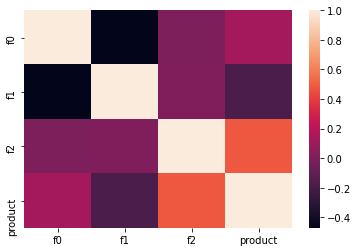

In [ ]:
sns.heatmap(data1.corr(method='spearman'))

В первом регионе сильной корреляции между данными нет.

<AxesSubplot:>

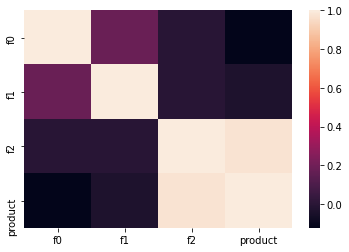

In [ ]:
sns.heatmap(data2.corr(method='spearman'))

Во втором регионе присутствует сильная корреляция между f2 и product.

<AxesSubplot:>

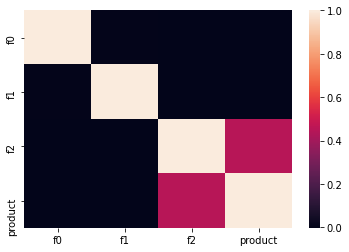

In [ ]:
sns.heatmap(data3.corr(method='spearman'))

В данных по третьему региону сильной мультиколлинеарности нет.

## Обучение и проверка модели

Разобьем данные на обучающую и валидационную выборку. Определим целевой признак - объем запасов в скважине 'product'.

In [ ]:
def split(data):
    features = data.drop(['product'], axis=1)
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                                  target, 
                                                                                  test_size=0.25, random_state=42)
    return features_train, features_valid, target_train, target_valid

In [ ]:
features_train1, features_valid1, target_train1, target_valid1 = split(data1)
features_train2, features_valid2, target_train2, target_valid2 = split(data2)
features_train3, features_valid3, target_train3, target_valid3 = split(data3)

Шкалируем данные.

In [ ]:
numeric = ['f0', 'f1', 'f2']
pd.options.mode.chained_assignment = None
scaler = MinMaxScaler()
scaler.fit(features_train1[numeric])
features_train1[numeric] = scaler.transform(features_train1[numeric])
features_valid1[numeric] = scaler.transform(features_valid1[numeric])

scaler.fit(features_train2[numeric])
features_train2[numeric] = scaler.transform(features_train2[numeric])
features_valid2[numeric] = scaler.transform(features_valid2[numeric])

scaler.fit(features_train3[numeric])
features_train3[numeric] = scaler.transform(features_train3[numeric])
features_valid3[numeric] = scaler.transform(features_valid3[numeric])

Применим обучающую модель - линейная регрессия.

Для первой локации.

In [ ]:
LinReg = LinearRegression(normalize=False)
LinReg.fit(features_train1, target_train1)
predicted_valid_geo1 = LinReg.predict(features_valid1)
RMSE_geo1 = mean_squared_error(target_valid1, predicted_valid_geo1)**0.5
predicted_valid_geo1_mean = predicted_valid_geo1.mean()

In [ ]:
print('RMSE', RMSE_geo1)

RMSE 37.75660035026169


In [ ]:
print('Средний запас предсказанного сырья', predicted_valid_geo1_mean)

Средний запас предсказанного сырья 92.39879990657768


Для второй локации.

In [ ]:
LinReg = LinearRegression(normalize=False)
LinReg.fit(features_train2, target_train2)
predicted_valid_geo2 = LinReg.predict(features_valid2)
RMSE_geo2 = mean_squared_error(target_valid2, predicted_valid_geo2)**0.5
predicted_valid_geo2_mean = predicted_valid_geo2.mean()

In [ ]:
print('RMSE', RMSE_geo2)

RMSE 0.8902801001028844


In [ ]:
print('Средний запас предсказанного сырья', predicted_valid_geo2_mean)

Средний запас предсказанного сырья 68.71287803913762


Для третьей локации.

In [ ]:
LinReg = LinearRegression(normalize=False)
LinReg.fit(features_train3, target_train3)
predicted_valid_geo3 = LinReg.predict(features_valid3)
RMSE_geo3 = mean_squared_error(target_valid3, predicted_valid_geo3)**0.5
predicted_valid_geo3_mean = predicted_valid_geo3.mean()

In [ ]:
print('RMSE', RMSE_geo3)

RMSE 40.14587231134218


In [ ]:
print('Средний запас предсказанного сырья', predicted_valid_geo3_mean)

Средний запас предсказанного сырья 94.77102387765939


In [ ]:
col = {
    'Локация': ['1', '2', '3'],
    'RMSE': [RMSE_geo1, RMSE_geo2, RMSE_geo3],
    'Средний запас предсказанного сырья': [predicted_valid_geo1_mean, predicted_valid_geo2_mean, predicted_valid_geo3_mean],
}
rev = pd.DataFrame(data=col)
rev

,Локация,RMSE,Средний запас предсказанного сырья
0,1,37.756600,92.398800
1,2,0.890280,68.712878
2,3,40.145872,94.771024


Самый низкий запас нефти во второй локации. И по второй локации самая маленькая среднеквадратичная ошибка. Так как во второй таблице были коррелирующие данные, модель переобучилась.

## Подготовка к расчёту прибыли

Сохраним нужные значения для расчетов в отдельные переменные.

In [ ]:
BUDGET = 10_000_000_000 #бюджет
INCOME_PBR = 450_000 #доход с единицы продукта
BEST_POINTS = 200 #количество лучших точек
RESEARCH_POINTS = 500 #количество исследуемых точек


Рассчитаем достаточный объем сырья для безубыточной разработки новой скважины.

In [ ]:
n = BUDGET / INCOME_PBR #достаточный объем сырья
n/200

111.11111111111111

In [ ]:
for i in range(len(datas)):
    print(datas[i]['product'].mean())

92.49968421774354
68.82391591804064
94.99834211933378


Среднее по регионам меньше достаточного объема сырья для безубыточности.

## Расчёт прибыли и рисков 

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям модели.

In [ ]:
def oil_revenue(target, predictions):
    sorted_predictions = pd.Series(predictions).sort_values(ascending=False)[:200]
    target_top = target.iloc[sorted_predictions.index]
    sorted_target_sum = target_top.sum()
    revenue = sorted_target_sum*INCOME_PBR
    
    return revenue - BUDGET

In [ ]:
def bootstrap_1000(target, predications):

    values=[]
    total=0
    state = np.random.RandomState(42)
    for i in range(1000):
        target_subsample = target.reset_index(drop=True).sample(n=500, replace=True, random_state=state)
        pred_subsample = predications[target_subsample.index]
        
        values.append(oil_revenue(target_subsample, pred_subsample))
    for i in values:
        if i<0:
            total+=1
    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    mean = values.mean()
    risk = total/1000
    print('Средняя прибыль', mean)
    print('95% интервал', (lower, upper))
    print('Риск', risk)
    return mean, lower, upper, risk

In [ ]:
bootstrap_1000(target_valid1, predicted_valid_geo1)

Средняя прибыль 399575478.05422974
95% интервал (-110467895.33197226, 897460327.7178793)
Риск 0.06


(399575478.05422974, -110467895.33197226, 897460327.7178793, 0.06)

In [ ]:
bootstrap_1000(target_valid2, predicted_valid_geo2)

Средняя прибыль 452048890.9064583
95% интервал (61684479.65422669, 845340177.5073848)
Риск 0.015


(452048890.9064583, 61684479.65422669, 845340177.5073848, 0.015)

In [ ]:
bootstrap_1000(target_valid3, predicted_valid_geo3)

Средняя прибыль 375009902.915329
95% интервал (-144766727.3048927, 888390403.5342213)
Риск 0.08


(375009902.915329, -144766727.3048927, 888390403.5342213, 0.08)

Самый прибыльный регион с низким риском - второй. Но так как в данных по этому региону есть мультиколлинеарность, эти данные нельзя считать верными. Поэтому, в качестве самого прибыльного региона возьмем первый.

### Выводы

В данном проекте мы рассмотрели датасет с данными о пробах нефти в трех регионах. Удалили столбец с данными, которые не нужны для предсказания. Разбили данные на выборки для обучения. Обучили модель методом LinearRegression.
Проанализировали прибыль и риски техникой bootstrap. 
Самая большая прибыль получилась во втором регионе.

## Чек-лист готовности проекта